# AVOCADOS_PRICE_PREDICTION

# Predicting the prices of Avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [63]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

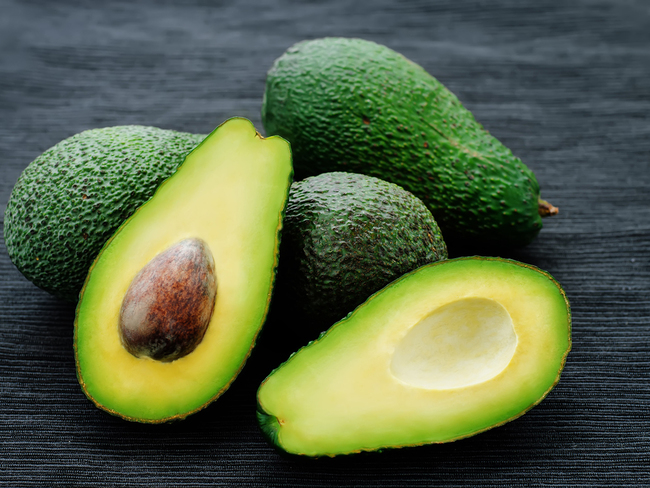

In [64]:
#display image using python
from IPython.display import Image
url = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\PROJECTS_NARESH_IT\Avocados_Price_Prediction\Avocado_img.jpg"
Image(url,height=300,width=400)

# Data Preparation

In [65]:
# Load dataset
df = pd.read_csv(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\PROJECTS_NARESH_IT\Avocados_Price_Prediction\avocado.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [67]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [68]:
# Missing value check
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [69]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [70]:
# The average value of the column
def get_avarage(df,column): 
    return sum(df[column])/len(df)

In [71]:
# The average between two columns in the dataset
def get_avarge_between_two_columns(df,column1,column2): 
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [72]:
# Function to draw a bar-plot
def plot(data,xlabel,ylabel):   
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage ' + ylabel + ' of Avocado According to ' + xlabel));

### Region with the lowest & highest prices of Avocado

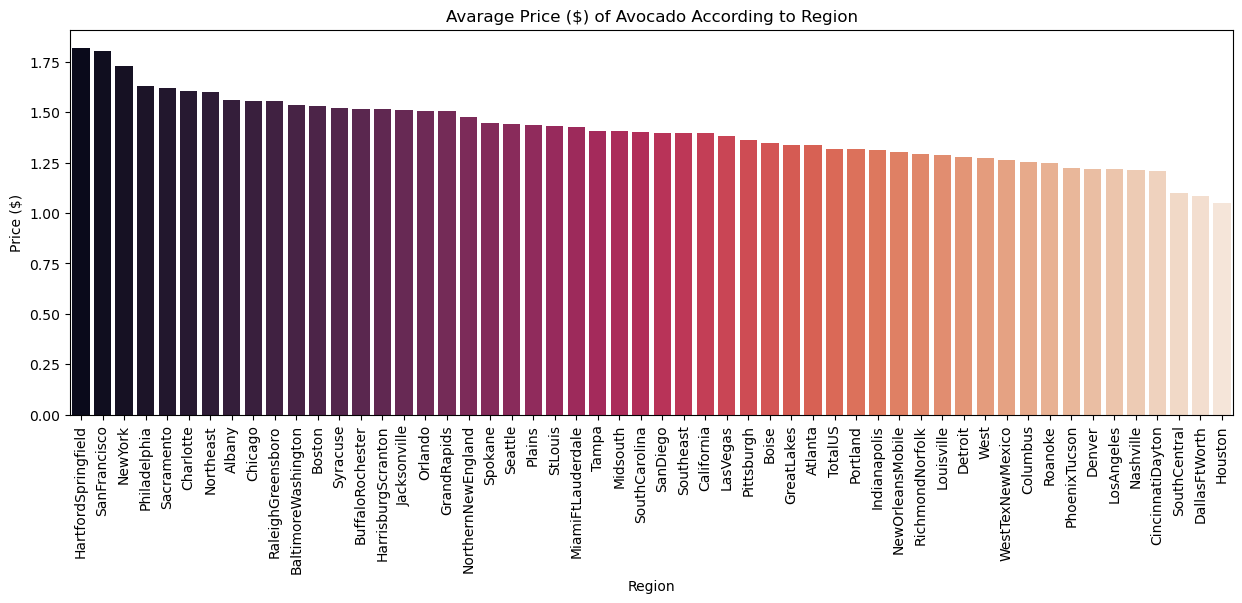

In [73]:
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [74]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


### Checking for and removing outliers

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

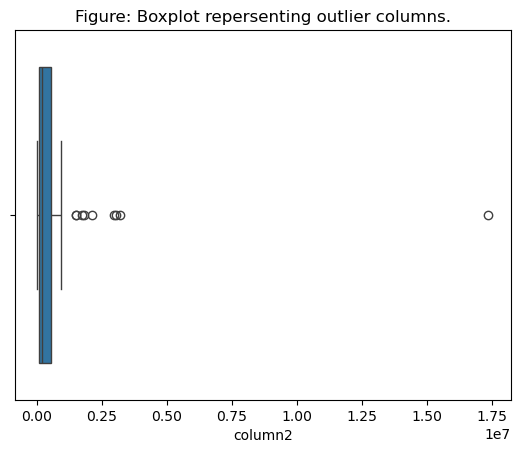

In [75]:
data2 = get_avarge_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [76]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [77]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

### Region with highest production of Avocados

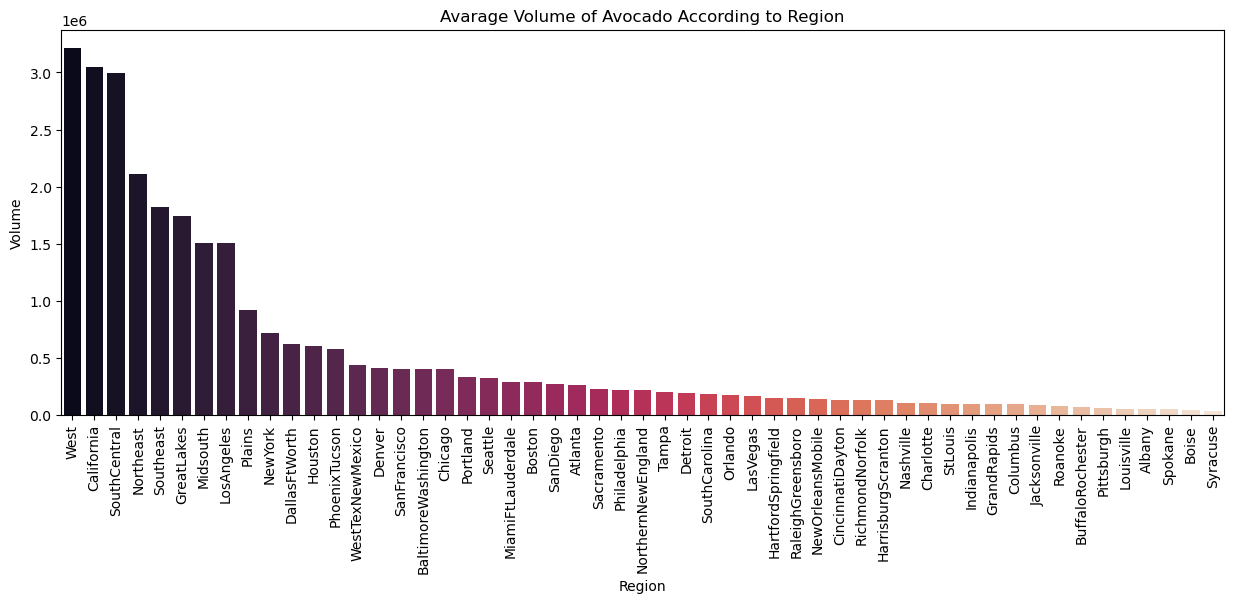

In [78]:
plot(data2,'Region','Volume')

### Average avocado prices each year

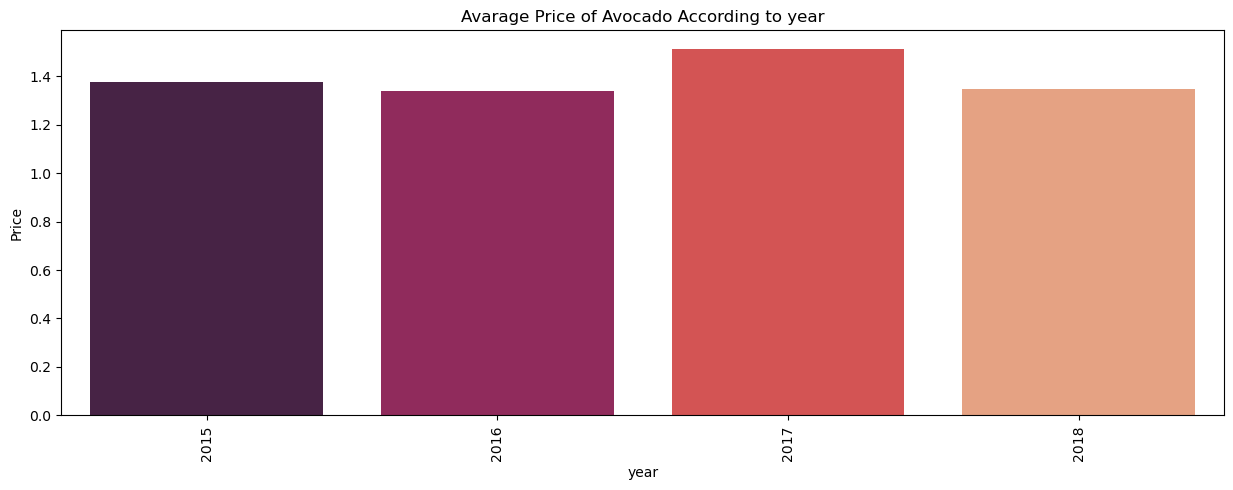

In [79]:
data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

### Average avocado volume each year

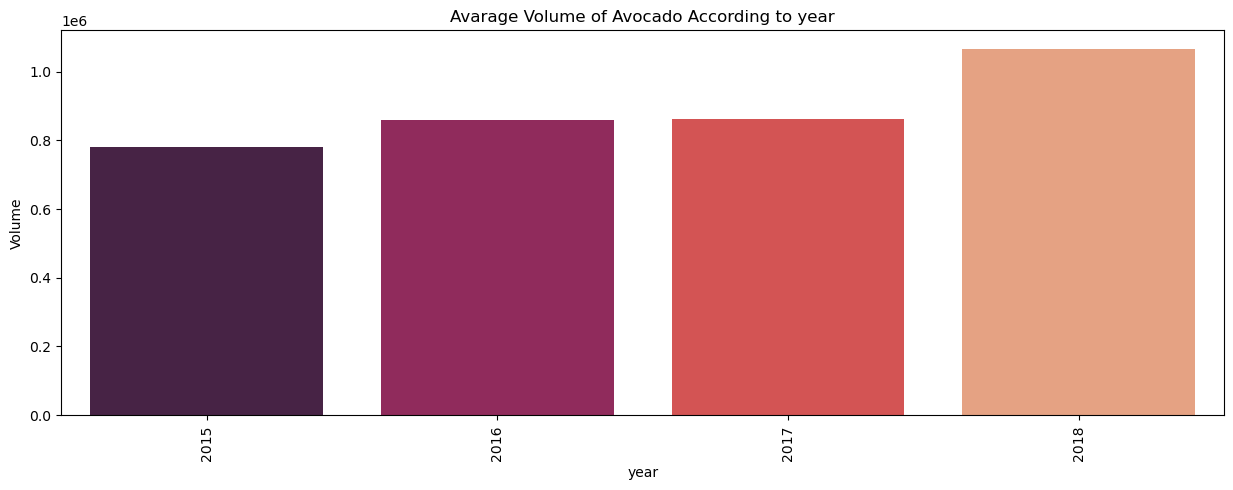

In [80]:
data4 = get_avarge_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

# Data Modelling

### Changing some column types to categories

In [81]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [83]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [84]:
# split data into X and Y
X = df.drop(['AveragePrice'],axis=1)
Y = df['AveragePrice']

# split data into traing and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

In [85]:
print("training set:",X_train.shape,' - ',Y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',Y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [86]:
# bulid and fit the model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
# prediction and calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(Y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176465679


In [88]:
# prediction and calculate the accuracy for the testing dataset
train_pre = model.predict(X_train)
train_score = r2_score(Y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.706860424104754


### The model doesn't work well with this dataset

# Comparision of all Regression Models

In [102]:
#importing the dataset
data = pd.read_csv(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\PROJECTS_NARESH_IT\Avocados_Price_Prediction\avocado.csv",index_col=0)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [104]:
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


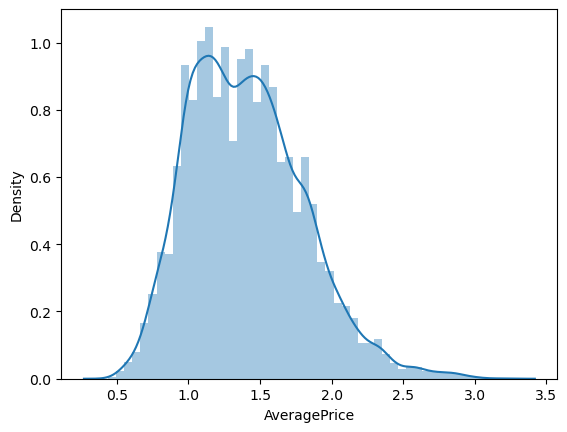

In [105]:
sns.distplot(data['AveragePrice']);

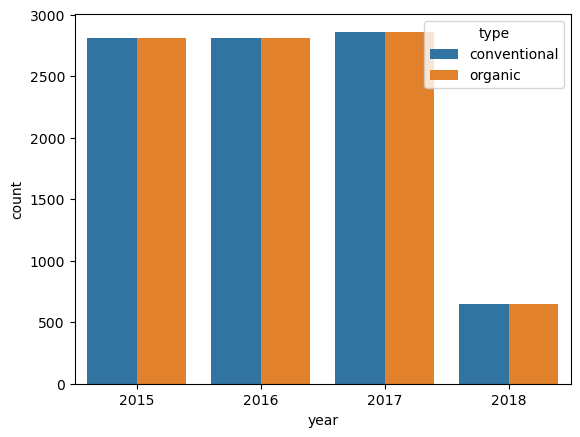

In [106]:
sns.countplot(x='year',data=data,hue='type');

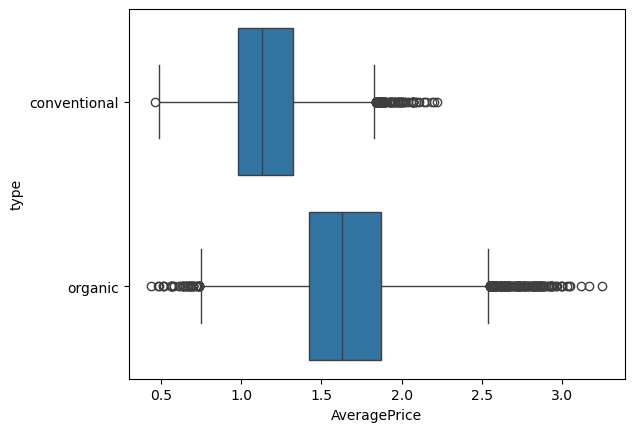

In [107]:
sns.boxplot(y="type", x="AveragePrice", data=data);

# Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.""""

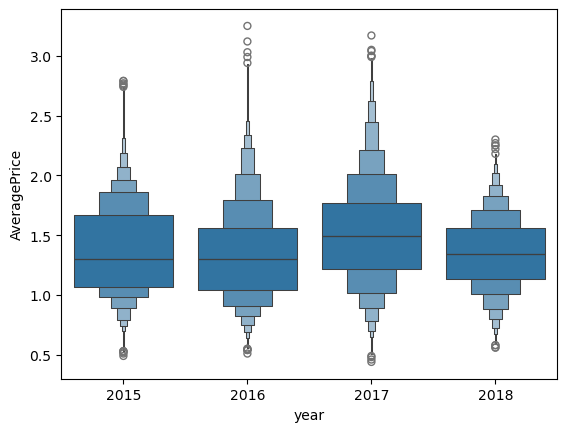

In [108]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

# Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

### Dealing with categorical features.

In [109]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

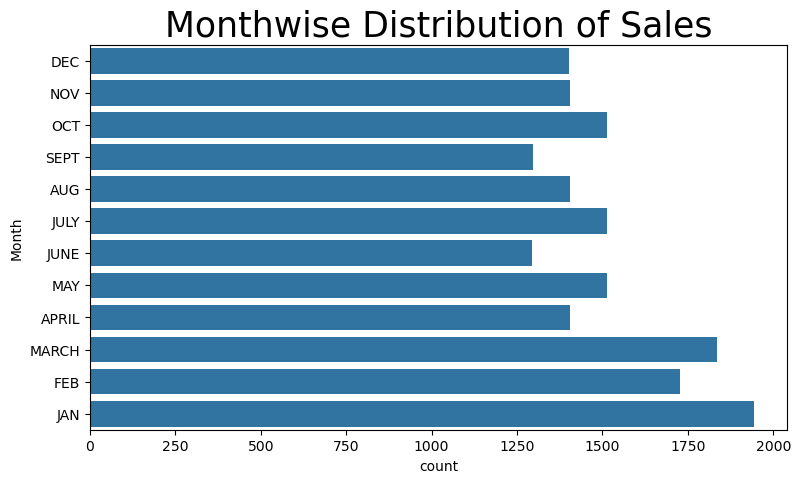

In [111]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

# It implies that sales of avacado see a rise in January, Febuary and March.

## Preparing data for ML models

In [112]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [114]:
pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [115]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)]

### Deep Neural Networks

In [120]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 2.1 MB/s eta 0:02:59
   ---------------------------------------- 1.6/376.0 MB 2.7 MB/s eta 0:02:19
   ---------------------------------------- 2.4/376.0 MB 2.9 MB/s eta 0:02:08
   ---------------------------------------- 2.9/376.0 MB 2.8 MB/s eta 0:02:12
   ---------------------------------------- 3.7/376.0 MB 2.9 MB/s eta 0:02:07
   ---------------------------------------- 4.5/376.0 MB 3.1 MB/s eta 0:02:02
    --------------------------------------- 5.0/376.0 MB 3.0 MB/s eta 0:02:05
    --------------------------------------- 5.8/376.0 MB 3.1 MB/s eta 0:01:59
    --------------------------------------- 6.6/376.0 MB 3.1 MB/s eta 0:01:58
    --------------------------------------- 7.1/376.0 MB 3.1 MB/s eta 0:01:58
    --------------------------------------- 7.3/376.0 MB 3.1 MB/s eta 0:01:58


In [121]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [ ]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2176 - mae: 0.8240 - val_loss: 0.0911 - val_mae: 0.2301
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0805 - mae: 0.2161 - val_loss: 0.0746 - val_mae: 0.2062
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0649 - mae: 0.1941 - val_loss: 0.0610 - val_mae: 0.1886
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578 - mae: 0.1812 - val_loss: 0.0564 - val_mae: 0.1814
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0546 - mae: 0.1735 - val_loss: 0.0534 - val_mae: 0.1752
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0509 - mae: 0.1672 - val_loss: 0.0510 - val_mae: 0.1698
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0457 - mae: 0.1573 - val_loss: 0.0488 - val_mae: 0.1656
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0449 - mae: 0.1558 - val_loss: 0.0472 - val_mae: 0.1611
Epoch 9/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

<Axes: >

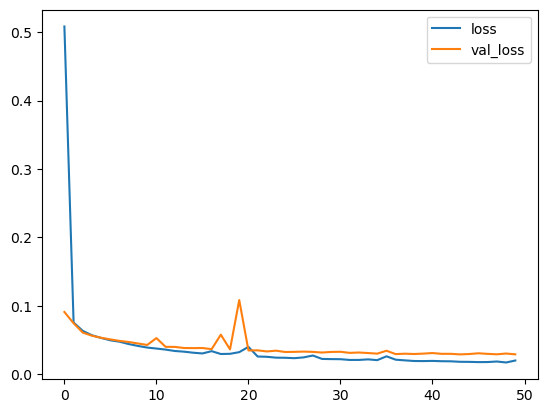

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

# Now this works:
losses = pd.DataFrame(history.history)
losses[['loss','val_loss']].plot()


In [125]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step


# Results Table

In [128]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

AttributeError: 'float' object has no attribute 'round'

In [129]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [130]:
# Let's have a look at methods performing best as they have R2-score close to 1.
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

KeyError: 'R2-score'

## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.